In [1]:
import sys
#sys.path.append("/home2/datahome/tpicard/PhD_MOMOPAR/CHAP2_APPLICATION_SAT/sat_prediction/code_notebook/")
#sys.path.append("/home2/datahome/tpicard/PhD_MOMOPAR/CHAP2_APPLICATION_SAT/")
#sys.path.append("/home2/datahome/tpicard/PhD_MOMOPAR/CHAP2_APPLICATION_SAT/sat_prediction/")
#sys.path.append("/home2/datahome/tpicard/PhD_MOMOPAR/CHAP2_APPLICATION_SAT/CNN_SSH_SST/")
#sys.path.append("/home2/datahome/tpicard/PhD_MOMOPAR/CHAP2_APPLICATION_SAT/CNN_SSH_SST/TRAIN_AND_VAL_SSH_SST/")

#from path_variables import *
#sys.path.append("/Users/tpicard/Desktop/satellite_prediction/code/create_satellite_data/")
#sys.path.append("/Users/tpicard/Desktop/satellite_prediction/code/create_satellite_data/")
sys.path.append("/home2/datahome/tpicard/PhD_MOMOPAR/CHAP2_APPLICATION_SAT/PLOT/0_TOOLS_ARTICLE/")


import torch
from matplotlib import rc, rcParams
#from R_tools_theo import *
from tools_analyse import * 
#from path_variables import *

import pandas as pd
import numpy as np
import matplotlib.colors as colors
import matplotlib.pyplot as plt
import datetime
import netCDF4 as nc

import datetime, numpy as np
import calendar
from datetime import timedelta
#%%% Correlation fct
from sklearn.linear_model import LinearRegression
#from tools_analyse import add_contour_per
from datetime import datetime
from cycler import cycler
import matplotlib as mpl
import random

gap200 = 38
gap100 = 43

def toTimestamp(d):
  return calendar.timegm(d.timetuple())

plt.rcParams['lines.linewidth'] = 2
plt.rcParams["figure.figsize"] = (10,5)
plt.rcParams["axes.edgecolor"] = "black"
plt.rcParams["axes.linewidth"] = 2.50
plt.rcParams['xtick.labelsize'] = 18  # Taille des ticks sur l'axe des x
plt.rcParams['ytick.labelsize'] = 18  # Taille des ticks sur l'axe des y
plt.rcParams['axes.titlesize'] = 18  # Taille du titre
plt.rcParams['axes.labelsize'] = 18  # Taille du label de l'axe des x
plt.rcParams['lines.markersize'] = 10
plt.rcParams['font.size'] = '20.0'
plt.rcParams['lines.markeredgewidth'] = 3


plt.rcParams["axes.edgecolor"] = "black"
plt.rcParams["axes.linewidth"] = 2.50

/home2/datahome/tpicard/conda-env/croco/lib/python3.8/site-packages/scipy/__init__.py:138: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.4)
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion} is required for this version of "


In [2]:
dir_save_prediction = '/home/datawork-lemar-apero/tpicard/DATA_SAT/2000_2023/prediction/'
name_nc = 'supermodel_ssh80_sst24_w{0}.nc'.format(100)
#print(name_nc)
nc_file = nc.Dataset(dir_save_prediction+name_nc,'r')
prediction_pdf = nc_file.variables["supermodel"][:-2]
mid_date_prediction = nc_file.variables["mid_date"][:-2]
std = nc_file.variables["std"][:-2]
nc_file.close()

file_satellite_chloro = "/home/datawork-lemar-apero/tpicard/DATA_SAT/2000_2023/chl_sat_tint.nc"

nc_file = nc.Dataset(file_satellite_chloro,'r')
chloro_images = nc_file.variables["chl"][:]
date_sat = nc_file.variables["time"][:]
nc_file.close()

In [3]:
mid_date_prediction_datetime = [datetime.strptime(date, '%Y-%m-%d').date() for date in mid_date_prediction]
date_pred =  np.array([toTimestamp(d) for d in mid_date_prediction_datetime]) 


In [4]:
half_tint = 6
chl_map = []

for i in range(date_pred.shape[0]):
    index_chl = np.argwhere((date_sat >= date_pred[i]-half_tint*3600*24) & (date_sat <= date_pred[i]+half_tint*3600*24))[:,0]
    if index_chl.shape[0]==0:
        index_chl=np.argwhere(date_sat==mid_date_jlag)
        #print('ok')
    chl_i = np.nanmean(chloro_images[index_chl,:],axis=0) # Try gaussian ponderation ? 
    chl_map.append(chl_i)

<ipython-input-4-1095084f0a92>:9: RuntimeWarning: Mean of empty slice
  chl_i = np.nanmean(chloro_images[index_chl,:],axis=0) # Try gaussian ponderation ?


In [150]:
date_pred.shape[0]

813

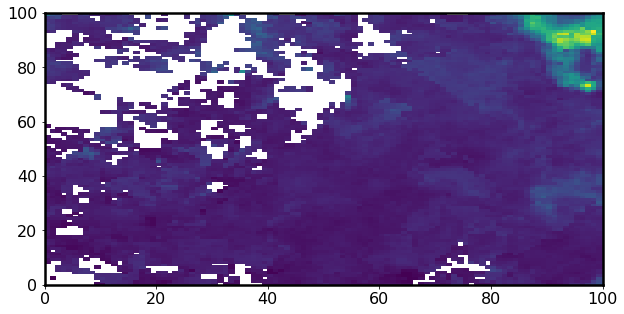

In [151]:
plt.pcolormesh(chl_map[12].T)

In [5]:
#np.argwhere(mid_date_prediction=="2008-08-12")


file_image_sat = "/home/datawork-lemar-apero/tpicard/DATA_SAT/input_satellite_data_2004_2016.nc"

# Import satellite data ssh u v
nc_file = nc.Dataset(file_image_sat, 'r')
image_test_nn = nc_file.variables["input"][:]
nc_file.close()

In [6]:
314-168

146

<ipython-input-7-0e17872d4481>:37: UserWarning: The following kwargs were not used by contour: 'label'
  cs0 = plt.contour(lon, lat,prediction_pdf[i,:,:].T,levels=levels_pred,colors=['r','r'],linestyles=[(0, (2, 1)),'-'],linewidths=3.5,label='Training sst24km ssh 80km')
<ipython-input-7-0e17872d4481>:39: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  cb = plt.pcolormesh(lon, lat,chl_map[i].T,cmap = cmap,vmax=1.5,vmin=0.1)


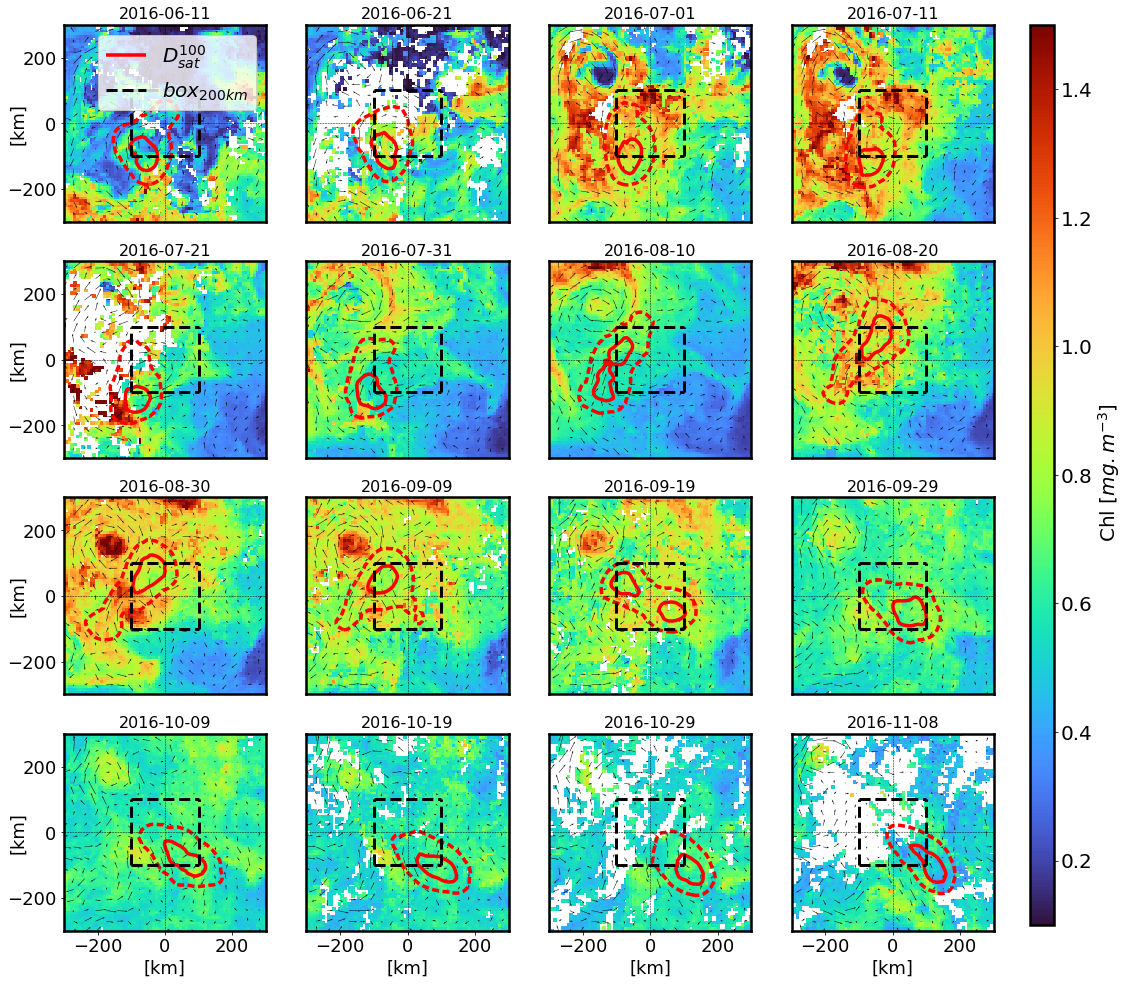

In [7]:
#%%%% Plot prediction vs 
#127
#list_index = [168,382,271,164,355,238,208,99,231,374,356,132]
#list_index = np.array(list_index) + 146

#list_index = [608,528,601,600,537,523,528,602,418,420,162,132+ 146]

list_index = [608,378,99+146,600,604,523,528,602,418,420,162,420]

list_index = np.arange(600,616,1)
#list_index = [208,168,382,271,164,355,208,99,231,135,374,356,132]

nb_dx= 100

lon = np.linspace(-400,400,nb_dx)
lat = np.linspace(-400,400,nb_dx)
fig = plt.figure(figsize=(20/1.2,20/1.2))

#list_index = [310]
filter_quiver = 4
n=0

#cmap = plt.cm.viridis
cmap = plt.cm.gist_gray_r
cmap = plt.cm.binary
cmap = plt.cm.terrain
cmap = plt.cm.turbo
#cmap = plt.cm.brg

for i in list_index:
    
    ax = fig.add_subplot(4,4,n+1)

    levels_pred,fmt = add_contour_per(prediction_pdf[i,:,:],[75,25])


    cs0 = plt.contour(lon, lat,prediction_pdf[i,:,:].T,levels=levels_pred,colors=['r','r'],linestyles=[(0, (2, 1)),'-'],linewidths=3.5,label='Training sst24km ssh 80km')

    cb = plt.pcolormesh(lon, lat,chl_map[i].T,cmap = cmap,vmax=1.5,vmin=0.1)
    #cb = plt.pcolormesh(lon, lat,chloro_images[i,:,:].T,cmap = plt.cm.jet)
    #cb = plt.pcolormesh(lon, lat,chloro_images[i,:,:].T,cmap = plt.cm.jet,norm=colors.LogNorm(vmin=0.1, vmax=4))
    #plt.colorbar(orientation='horizontal')
    
    plt.quiver(lon[::filter_quiver],lat[::filter_quiver], image_test_nn[i-146,7,::filter_quiver,::filter_quiver].T,image_test_nn[i-146,8,::filter_quiver,::filter_quiver].T)
    
    if n < 12:
        plt.yticks([],size=20)
        plt.xticks([],size=20)
        #plt.xticks([],size=14)
    else:
        #plt.yticks([-400,-200,0,200,400])
        plt.yticks([],size=20)
        plt.xticks([-400,-200,0,200,400],rotation = 0)
        plt.xlabel('[km]')
    
    if n%4==0:
        plt.yticks([-400,-200,0,200,400])
        plt.ylabel('[km]',labelpad=-20)
 
        
    plt.title(mid_date_prediction[i],size=16)
    #plt.title([i],size=16)
    plt.axvline(x=0,color='black',linestyle='--',linewidth=0.5)
    plt.axhline(y=0,color='black',linestyle='--',linewidth=0.5)
    
    lwidth = 3
    cbox = 'k'
    plt.hlines(-100,-100,100,linestyle='--',color=cbox,linewidth=lwidth,label='$box_{200km}$')
    plt.hlines(100,-100,100,linestyle='--',color=cbox,linewidth=lwidth)
    plt.vlines(100,-100,100,linestyle='--',color=cbox,linewidth=lwidth)
    plt.vlines(-100,-100,100,linestyle='--',color=cbox,linewidth=lwidth)
    

    n+=1
    
    xlim = 300
    plt.xlim(-xlim,xlim)
    plt.ylim(-xlim,xlim)
    if n ==1:
        cs0.collections[1].set_label('$D_{sat}^{100}$')
        #plt.legend(loc='upper left', bbox_to_anchor=(1.10, 1))
        plt.legend(loc='upper right')
        
cbaxes = fig.add_axes([0.93, 0.13, 0.02, 0.75]) 
cb = plt.colorbar(cb,ax = ax, cax = cbaxes,orientation="vertical")  
cb.set_label(r' Chl $[mg.m^{-3}] $', fontsize=20)
cb.ax.tick_params(labelsize=20)

#plt.savefig("prediction_and_chloro_l3_2016.png",bbox_inches='tight',facecolor='white',dpi=300)


In [8]:
[608,528,601,600,537,523,528,602,418,420,162]

[608, 528, 601, 600, 537, 523, 528, 602, 418, 420, 162]

In [234]:
list_index = np.arange(600,617,1)

In [235]:
list_index

array([600, 601, 602, 603, 604, 605, 606, 607, 608, 609, 610, 611, 612,
       613, 614, 615, 616])

<ipython-input-236-035c5d2b3a87>:34: UserWarning: The following kwargs were not used by contour: 'label'
  cs0 = plt.contour(lon, lat,prediction_pdf[i,:,:].T,levels=levels_pred,colors=['r','r'],linestyles=['dotted','-'],linewidths=4,label='Training sst24km ssh 80km')
<ipython-input-236-035c5d2b3a87>:36: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  cb = plt.pcolormesh(lon, lat,chl_map[i].T,cmap = cmap,vmax=1.5,vmin=0.1)


ValueError: num must be 1 <= num <= 16, not 17

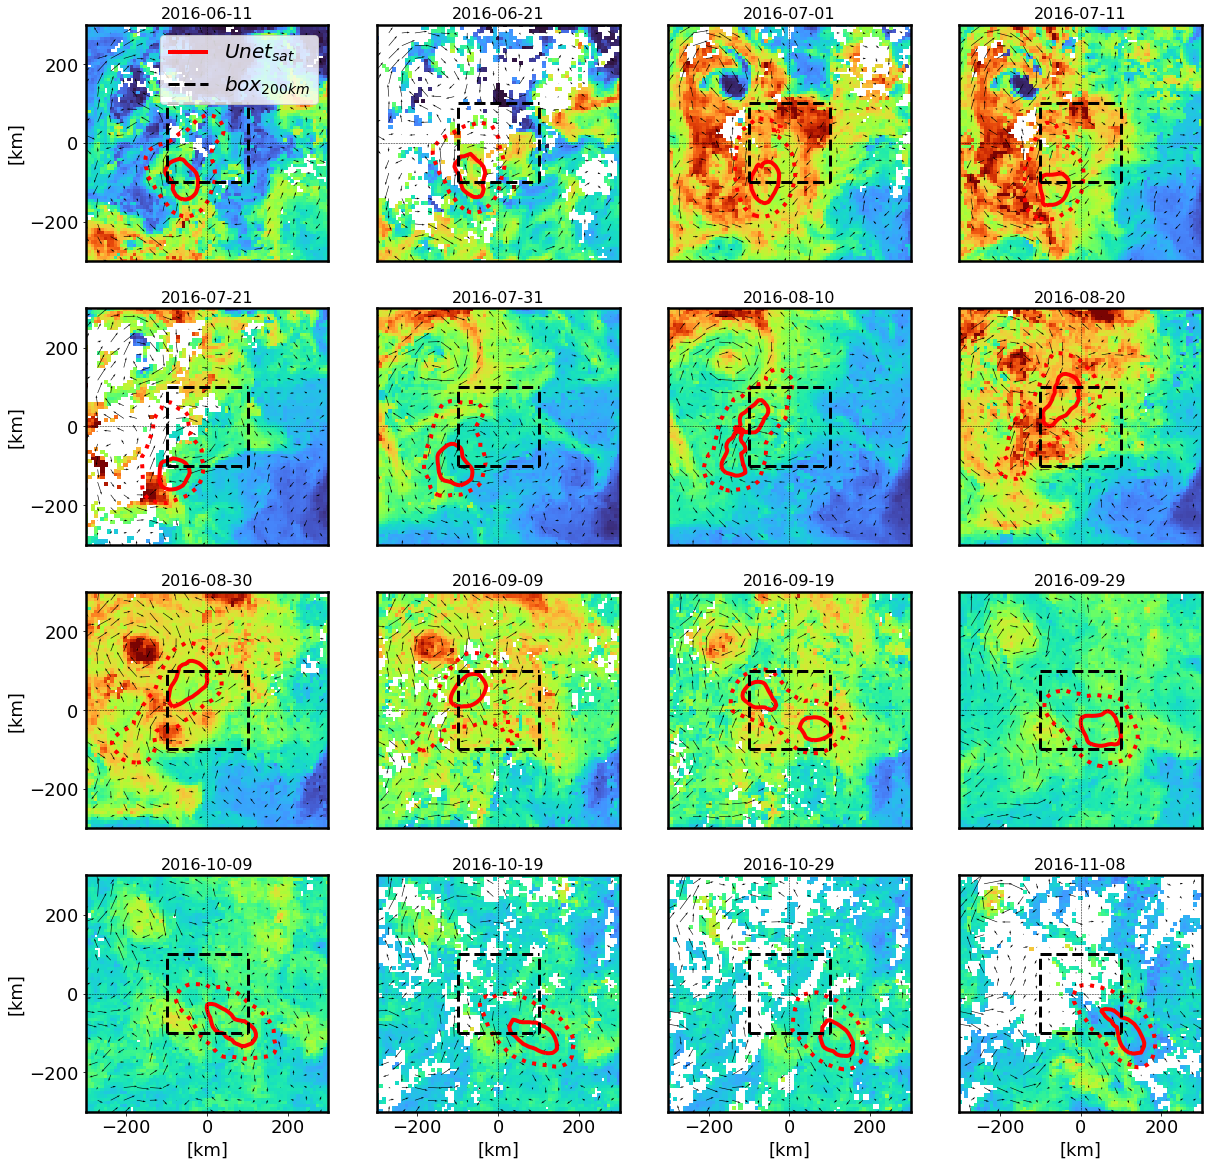

In [236]:
#%%%% Plot prediction vs 
#127

#list_index = np.random.randint(600,471+146,size=16)
#list_index = np.random.randint(100,300,size=16)
list_index = np.arange(600,617,1)
#list_index = [168,382,271,164,355,238,208,99,231,374,356,132]
#list_index = np.array(list_index) + 146
#list_index = [208,168,382,271,164,355,208,99,231,135,374,356,132]
nb_dx= 100

lon = np.linspace(-400,400,nb_dx)
lat = np.linspace(-400,400,nb_dx)
fig = plt.figure(figsize=(20,20))

#list_index = [310]
filter_quiver = 4
n=0

#cmap = plt.cm.viridis
cmap = plt.cm.gist_gray_r
cmap = plt.cm.binary
cmap = plt.cm.terrain
cmap = plt.cm.turbo
#cmap = plt.cm.brg

for i in list_index:
    
    ax = fig.add_subplot(4,4,n+1)

    levels_pred,fmt = add_contour_per(prediction_pdf[i,:,:],[75,25])


    cs0 = plt.contour(lon, lat,prediction_pdf[i,:,:].T,levels=levels_pred,colors=['r','r'],linestyles=['dotted','-'],linewidths=4,label='Training sst24km ssh 80km')

    cb = plt.pcolormesh(lon, lat,chl_map[i].T,cmap = cmap,vmax=1.5,vmin=0.1)
    #cb = plt.pcolormesh(lon, lat,chloro_images[i,:,:].T,cmap = plt.cm.jet)
    #cb = plt.pcolormesh(lon, lat,chloro_images[i,:,:].T,cmap = plt.cm.jet,norm=colors.LogNorm(vmin=0.1, vmax=4))
    #plt.colorbar(orientation='horizontal')
    
    plt.quiver(lon[::filter_quiver],lat[::filter_quiver], image_test_nn[i-146,7,::filter_quiver,::filter_quiver].T,image_test_nn[i-146,8,::filter_quiver,::filter_quiver].T)
    
    if n < 12:
        plt.yticks([],size=20)
        plt.xticks([],size=20)
        #plt.xticks([],size=14)
    else:
        #plt.yticks([-400,-200,0,200,400])
        plt.yticks([],size=20)
        plt.xticks([-400,-200,0,200,400],rotation = 0)
        plt.xlabel('[km]')
    
    if n%4==0:
        plt.yticks([-400,-200,0,200,400])
        plt.ylabel('[km]')
 
        
    plt.title(mid_date_prediction[i],size=16)
    #plt.title([i],size=16)
    plt.axvline(x=0,color='black',linestyle='--',linewidth=0.5)
    plt.axhline(y=0,color='black',linestyle='--',linewidth=0.5)
    
    lwidth = 3
    cbox = 'k'
    plt.hlines(-100,-100,100,linestyle='--',color=cbox,linewidth=lwidth,label='$box_{200km}$')
    plt.hlines(100,-100,100,linestyle='--',color=cbox,linewidth=lwidth)
    plt.vlines(100,-100,100,linestyle='--',color=cbox,linewidth=lwidth)
    plt.vlines(-100,-100,100,linestyle='--',color=cbox,linewidth=lwidth)
    

    n+=1
    
    xlim = 300
    plt.xlim(-xlim,xlim)
    plt.ylim(-xlim,xlim)
    if n ==1:
        cs0.collections[1].set_label('$Unet_{sat}$')
        #plt.legend(loc='upper left', bbox_to_anchor=(1.10, 1))
        plt.legend(loc='upper right')
        
cbaxes = fig.add_axes([0.93, 0.13, 0.02, 0.75]) 
cb = plt.colorbar(cb,ax = ax, cax = cbaxes,orientation="vertical")  
cb.set_label(r' chl $[mg.m^{-3}] $', fontsize=20)
cb.ax.tick_params(labelsize=20)

<ipython-input-209-f4f3c836a0fa>:22: UserWarning: The following kwargs were not used by contour: 'label'
  cs0 = plt.contour(lon, lat,prediction_pdf[i,:,:].T,levels=levels_pred,colors=['r','r'],linestyles=['dotted','-'],linewidths=4,label='Training sst24km ssh 80km')
<ipython-input-209-f4f3c836a0fa>:23: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  cb = plt.pcolormesh(lon, lat,chl_map[i].T,cmap = cmap)


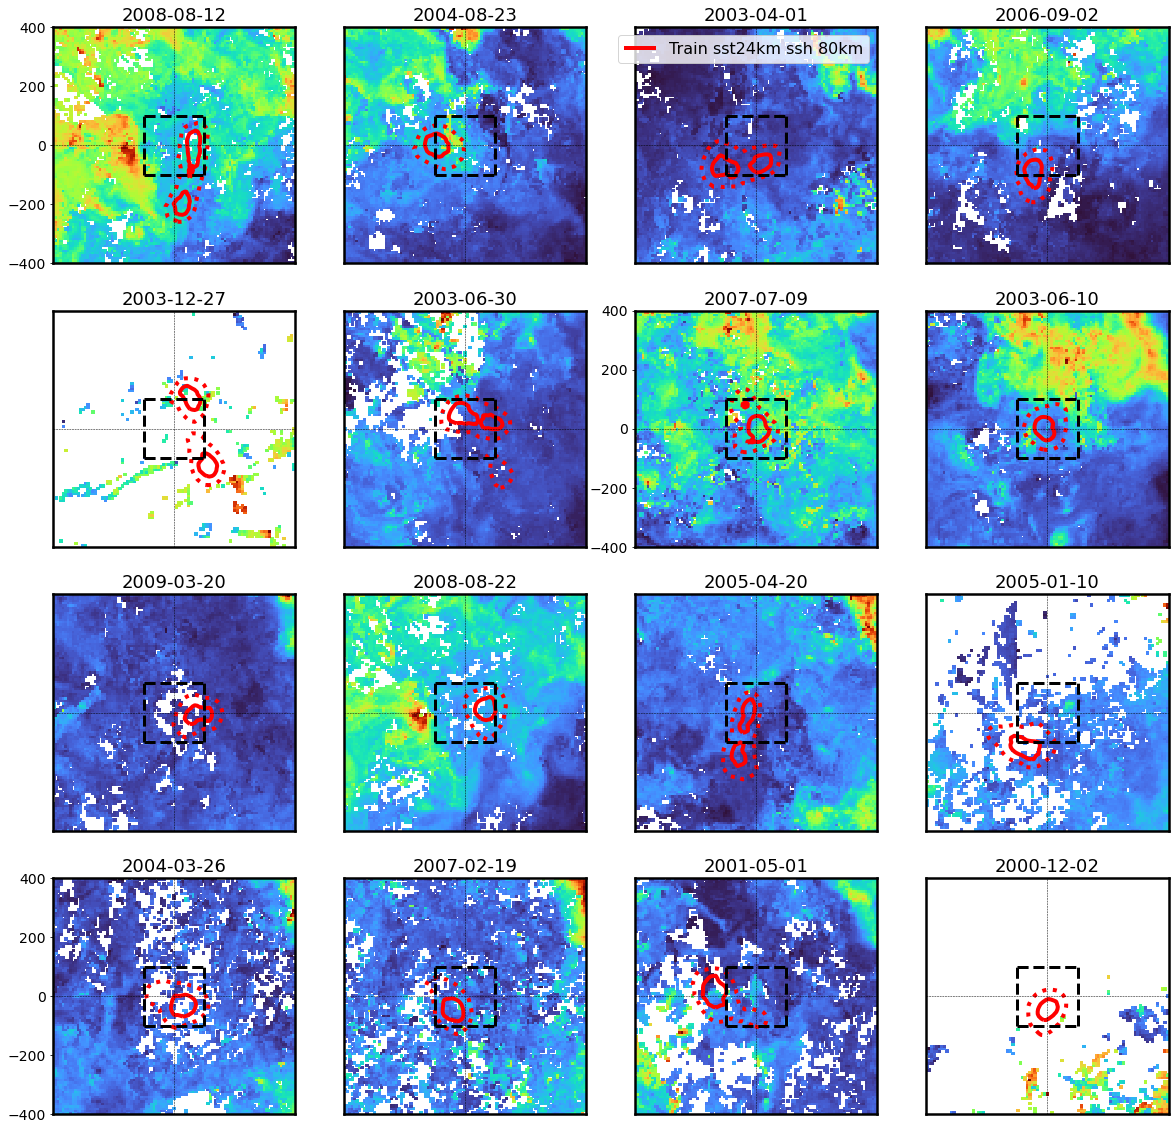

In [209]:
#%%%% Plot prediction vs 
nb_dx= 100

lon = np.linspace(-400,400,nb_dx)
lat = np.linspace(-400,400,nb_dx)
fig = plt.figure(figsize=(20,20))

#list_index = [310]
list_index = np.random.randint(0,400,size=16)
list_index[0]=314
n=0

cmap = plt.cm.turbo

for i in list_index:
    
    ax = fig.add_subplot(4,4,n+1)

    levels_pred,fmt = add_contour_per(prediction_pdf[i,:,:],[60,20])
    #levels_pred_2km,fmt = add_contour_per(prediction_pdf_2km[i,:,:],[60,20])
 
    cs0 = plt.contour(lon, lat,prediction_pdf[i,:,:].T,levels=levels_pred,colors=['r','r'],linestyles=['dotted','-'],linewidths=4,label='Training sst24km ssh 80km')
    cb = plt.pcolormesh(lon, lat,chl_map[i].T,cmap = cmap)
    
    plt.yticks([],size=14)
    plt.xticks([],size=14)
    
    if n%6==0:
        plt.yticks([-400,-200,0,200,400],size=14)
    if n > 29:
        plt.xticks([-400,-200,0,200,400],size=14,rotation = 45)
        plt.xlabel('[km]',size=14)
        
    if n ==2:
        cs0.collections[1].set_label('Train sst24km ssh 80km')
        #cs1.collections[1].set_label('Train 8km')

        plt.legend(prop={'size': 16},loc = 1)
        
    n+=1
    
    plt.title(mid_date_prediction[i])
    plt.axvline(x=0,color='black',linestyle='--',linewidth=0.5)
    plt.axhline(y=0,color='black',linestyle='--',linewidth=0.5)
    
    plt.hlines(-100,-100,100,linestyle='--',color='k',linewidth=3)
    plt.hlines(100,-100,100,linestyle='--',color='k',linewidth=3)
    plt.vlines(100,-100,100,linestyle='--',color='k',linewidth=3)
    plt.vlines(-100,-100,100,linestyle='--',color='k',linewidth=3)
    
#plt.savefig("prediction_and_chloro.png")

In [14]:
file_image_sat = "/home/datawork-lemar-apero/tpicard/DATA_SAT/input_satellite_data_2004_2016.nc"

# Import satellite data ssh u v
nc_file = nc.Dataset(file_image_sat, 'r')
image_test_nn = nc_file.variables["input"][:]
nc_file.close()

In [19]:
print(image_test_nn.shape)
print(prediction_pdf.shape)


(471, 25, 100, 100)
(471, 100, 100)


In [20]:
list_index = [412,208,168,382,271,324,164,150,27,355,41,299,267,151,208,99,231,3,135,303,374,356,132]
#list_index = [208,168,382,238,212]

<ipython-input-39-02b0183a8ff8>:29: UserWarning: The following kwargs were not used by contour: 'label'
  cs0 = plt.contour(lon, lat,prediction_pdf[i,:,:].T,levels=levels_pred,colors=['r','r'],linestyles=['dotted','-'],linewidths=4,label='Training sst24km ssh 80km')
<ipython-input-39-02b0183a8ff8>:31: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  cb = plt.pcolormesh(lon, lat,chloro_images[i,:,:].T,cmap = cmap,vmax=1,vmin=0.1)


NameError: name 'image_test_nn' is not defined

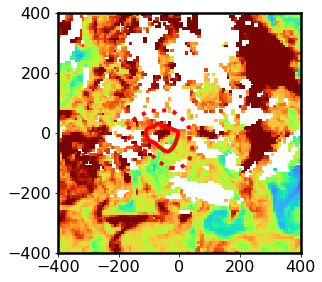

In [39]:
#%%%% Plot prediction vs 
#127
list_index = [168,382,271,164,355,238,208,99,231,374,356,132]
#list_index = [208,168,382,271,164,355,208,99,231,135,374,356,132]
nb_dx= 100

lon = np.linspace(-400,400,nb_dx)
lat = np.linspace(-400,400,nb_dx)
fig = plt.figure(figsize=(20,15))

#list_index = [310]
filter_quiver = 4
n=0

#cmap = plt.cm.viridis
cmap = plt.cm.gist_gray_r
cmap = plt.cm.binary
cmap = plt.cm.terrain
cmap = plt.cm.turbo
#cmap = plt.cm.brg

for i in list_index:
    
    ax = fig.add_subplot(3,4,n+1)

    levels_pred,fmt = add_contour_per(prediction_pdf[i,:,:],[75,25])


    cs0 = plt.contour(lon, lat,prediction_pdf[i,:,:].T,levels=levels_pred,colors=['r','r'],linestyles=['dotted','-'],linewidths=4,label='Training sst24km ssh 80km')

    cb = plt.pcolormesh(lon, lat,chloro_images[i,:,:].T,cmap = cmap,vmax=1,vmin=0.1)
    #cb = plt.pcolormesh(lon, lat,chloro_images[i,:,:].T,cmap = plt.cm.jet)
    #cb = plt.pcolormesh(lon, lat,chloro_images[i,:,:].T,cmap = plt.cm.jet,norm=colors.LogNorm(vmin=0.1, vmax=4))
    #plt.colorbar(orientation='horizontal')
    
    plt.quiver(lon[::filter_quiver],lat[::filter_quiver], image_test_nn[i,7,::filter_quiver,::filter_quiver].T,image_test_nn[i,8,::filter_quiver,::filter_quiver].T)
    
    if n < 8:
        plt.yticks([],size=20)
        plt.xticks([],size=20)
        #plt.xticks([],size=14)
    else:
        #plt.yticks([-400,-200,0,200,400])
        plt.yticks([],size=20)
        plt.xticks([-400,-200,0,200,400],rotation = 0)
        plt.xlabel('[km]')
    
    if n%4==0:
        plt.yticks([-400,-200,0,200,400])
        plt.ylabel('[km]')
 
        
    plt.title(mid_date_prediction[i],size=16)
    #plt.title([i],size=16)
    plt.axvline(x=0,color='black',linestyle='--',linewidth=0.5)
    plt.axhline(y=0,color='black',linestyle='--',linewidth=0.5)
    
    lwidth = 3
    cbox = 'k'
    plt.hlines(-100,-100,100,linestyle='--',color=cbox,linewidth=lwidth,label='$box_{200km}$')
    plt.hlines(100,-100,100,linestyle='--',color=cbox,linewidth=lwidth)
    plt.vlines(100,-100,100,linestyle='--',color=cbox,linewidth=lwidth)
    plt.vlines(-100,-100,100,linestyle='--',color=cbox,linewidth=lwidth)
    

    n+=1
    
    xlim = 300
    plt.xlim(-xlim,xlim)
    plt.ylim(-xlim,xlim)
    if n ==1:
        cs0.collections[1].set_label('$Unet_{sat}$')
        #plt.legend(loc='upper left', bbox_to_anchor=(1.10, 1))
        plt.legend(loc='upper right')
        
cbaxes = fig.add_axes([0.93, 0.13, 0.02, 0.75]) 
cb = plt.colorbar(cb,ax = ax, cax = cbaxes,orientation="vertical")  
cb.set_label(r' chl $[mg.m^{-3}] $', fontsize=20)
cb.ax.tick_params(labelsize=20)

#plt.savefig("prediction_sat_with_chloro_15cases.png",dpi=100)

# 3 plots

<ipython-input-22-10d6ad6235bf>:19: UserWarning: The following kwargs were not used by contour: 'label'
  cs0 = plt.contour(lon, lat,prediction_pdf[i,:,:].T,levels=levels_pred,colors=['k','k'],linestyles=['dotted','-'],linewidths=5,label='Training sst24km ssh 80km')
<ipython-input-22-10d6ad6235bf>:21: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  cb = plt.pcolormesh(lon, lat,chloro_images[i,:,:].T,cmap = plt.cm.jet,vmax=1)


NameError: name 'mid_date' is not defined

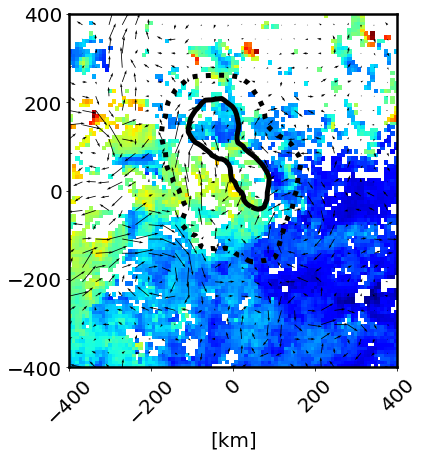

In [22]:
#%%%% Plot prediction vs 
list_index = [208,168,382]
nb_dx= 100

lon = np.linspace(-400,400,nb_dx)
lat = np.linspace(-400,400,nb_dx)
fig = plt.figure(figsize=(20,6.5))

#list_index = [310]
filter_quiver = 4 
n=0
for i in list_index:
    
    ax = fig.add_subplot(1,3,n+1)

    levels_pred,fmt = add_contour_per(prediction_pdf[i,:,:],[99,50])


    cs0 = plt.contour(lon, lat,prediction_pdf[i,:,:].T,levels=levels_pred,colors=['k','k'],linestyles=['dotted','-'],linewidths=5,label='Training sst24km ssh 80km')

    cb = plt.pcolormesh(lon, lat,chloro_images[i,:,:].T,cmap = plt.cm.jet,vmax=1)
    #cb = plt.pcolormesh(lon, lat,chloro_images[i,:,:].T,cmap = plt.cm.jet,norm=colors.LogNorm(vmin=0.2, vmax=4))
    #plt.colorbar(orientation='horizontal')
    
    plt.quiver(lon[::filter_quiver],lat[::filter_quiver], image_test_nn[i,7,::filter_quiver,::filter_quiver].T,image_test_nn[i,8,::filter_quiver,::filter_quiver].T)
    
    if n > 0:
        plt.yticks([],size=20)
        plt.xticks([-400,-200,0,200,400],rotation = 45)
        #plt.xticks([],size=14)
    else:
        plt.yticks([-400,-200,0,200,400])
        plt.xticks([-400,-200,0,200,400],rotation = 45)
        plt.xlabel('[km]')

    plt.title(mid_date[i])
    plt.axvline(x=0,color='black',linestyle='--',linewidth=0.5)
    plt.axhline(y=0,color='black',linestyle='--',linewidth=0.5)
    
    lwidth = 4 
    cbox = 'r'
    plt.hlines(-100,-100,100,linestyle='--',color=cbox,linewidth=lwidth,label='200km box')
    plt.hlines(100,-100,100,linestyle='--',color=cbox,linewidth=lwidth)
    plt.vlines(100,-100,100,linestyle='--',color=cbox,linewidth=lwidth)
    plt.vlines(-100,-100,100,linestyle='--',color=cbox,linewidth=lwidth)
    
    if n ==2:
        cs0.collections[1].set_label('Unet surf')

        plt.legend(loc = 1)
        
    n+=1
    

    
cbaxes = fig.add_axes([0.93, 0.13, 0.02, 0.75]) 
cb = plt.colorbar(cb,ax = ax, cax = cbaxes,orientation="vertical")  
cb.set_label(r' Chl $[mg.m^{-3}] $', fontsize=20)
cb.ax.tick_params(labelsize=20)

#plt.savefig("prediction_sat_with_chloro.png")

In [23]:
100/8

12.5

In [24]:
#%%%% Plot prediction vs 
nb_dx= 100

lon = np.linspace(-400,400,nb_dx)
lat = np.linspace(-400,400,nb_dx)
fig = plt.figure(figsize=(20,20))

#list_index = [310]

chl_inside_pred = []
ch_inside_box = []

n=0

for i in list_index[:]:
    
    chl_inside_pred.append(np.nansum(chloro_images[i,:,:]*prediction_pdf[i,:,:]))
    ch_inside_box.append(np.nanmean(chloro_images[i,38:62,38:62]))
    
chl_inside_pred = np.array(chl_inside_pred)
ch_inside_box = np.array(ch_inside_box)

<Figure size 1440x1440 with 0 Axes>

In [25]:
(chl_inside_pred - ch_inside_box) / chl_inside_pred

array([ -1.22301337,  -0.95276845, -39.24119411])

In [26]:
np.mean((1-chl_inside_pred)*100)

79.86042530875055

In [27]:
chl_inside_pred = np.array(chl_inside_pred)
ch_inside_box = np.array(ch_inside_box)

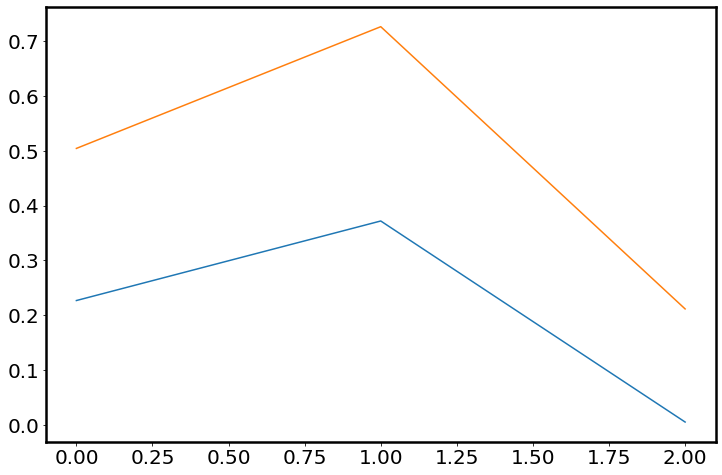

In [28]:
plt.plot(chl_inside_pred)
plt.plot(ch_inside_box)

#plt.scatter(chl_inside_pred)
#plt.scatter(ch_inside_box)